Dataset Regresión Logística – Heart Disease Cleveland UCI:

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [232]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [234]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('heart_cleveland_upload.csv')

In [236]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [238]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en chol')

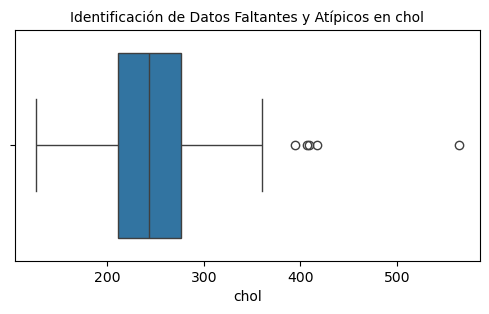

In [240]:
#Identificación de Datos Faltantes y Atípicos

# Configuración del tamaño de la figura
plt.figure(figsize=(6, 3))

# Creación del boxplot para la variable 'chol' (colesterol sérico)
sns.boxplot(x=Datos['chol'])

# Título del gráfico
plt.title('Identificación de Datos Faltantes y Atípicos en chol', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en trestbps')

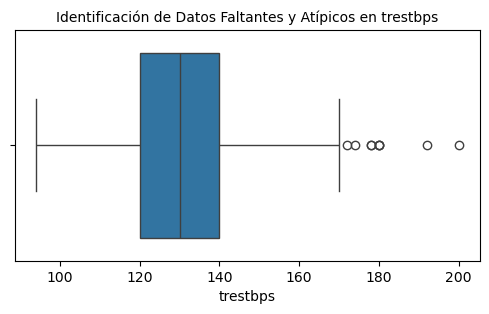

In [242]:
#Identificación de Datos Faltantes y Atípicos

# Configuración del tamaño de la figura
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos en trestbps', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en thalach')

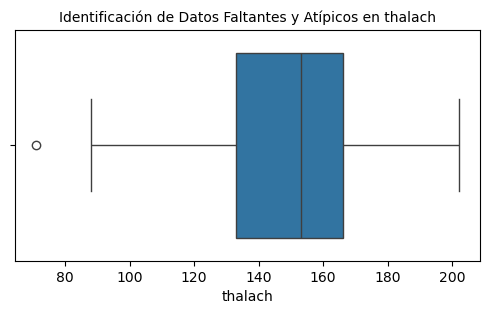

In [244]:
#Identificación de Datos Faltantes y Atípicos

# Configuración del tamaño de la figura
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Faltantes y Atípicos en thalach', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en oldpeak')

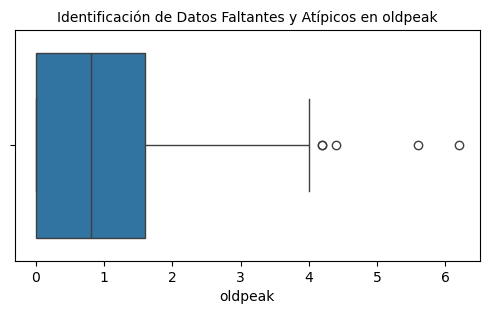

In [246]:
#Identificación de Datos Faltantes y Atípicos

# Configuración del tamaño de la figura
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Faltantes y Atípicos en oldpeak', fontsize=10)

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [249]:
# Revisión de datos faltantes en cada columna
Datos.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [251]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en age: ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en sex: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en cp: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en trestbps: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en chol: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en fbs: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en restecg: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en thalach: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en exang: ",Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en ca: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en thal: ",Datos['thal'].isin([0]).sum())
print("Cantidad de Registros con cero en condition: ",Datos['condition'].isin([0]).sum())

Cantidad de Registros con cero en age:  0
Cantidad de Registros con cero en sex:  96
Cantidad de Registros con cero en cp:  23
Cantidad de Registros con cero en trestbps:  0
Cantidad de Registros con cero en chol:  0
Cantidad de Registros con cero en fbs:  254
Cantidad de Registros con cero en restecg:  147
Cantidad de Registros con cero en thalach:  0
Cantidad de Registros con cero en exang:  200
Cantidad de Registros con cero en oldpeak:  96
Cantidad de Registros con cero en slope:  139
Cantidad de Registros con cero en ca:  174
Cantidad de Registros con cero en thal:  164
Cantidad de Registros con cero en condition:  160


In [253]:
# Reemplazar los ceros con la media solo en variables donde un 0 puede representar un valor faltante.

Datos['fbs'] = Datos['fbs'].replace(0, Datos['fbs'].mean())
Datos['oldpeak'] = Datos['oldpeak'].replace(0, Datos['oldpeak'].mean())
Datos['slope'] = Datos['slope'].replace(0, Datos['slope'].mean())
Datos['ca'] = Datos['ca'].replace(0, Datos['ca'].mean())
Datos['thal'] = Datos['thal'].replace(0, Datos['thal'].mean())

In [255]:
#Revisión nuevamente de datos faltantes

print("Cantidad de Registros con cero en fbs: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en ca: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en thal: ",Datos['thal'].isin([0]).sum())

Cantidad de Registros con cero en fbs:  0
Cantidad de Registros con cero en oldpeak:  0
Cantidad de Registros con cero en slope:  0
Cantidad de Registros con cero en ca:  0
Cantidad de Registros con cero en thal:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos en Presión Sanguínea')

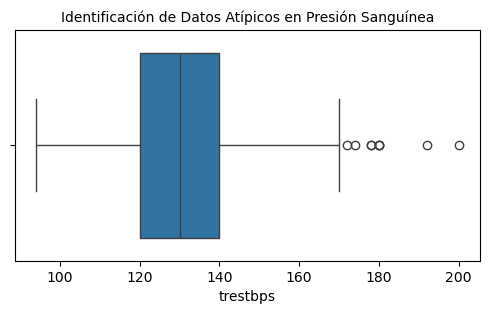

In [257]:
# Identificación de Datos Atípicos para cada columna

# 1. Presión Sanguínea (trestbps)
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Atípicos en Presión Sanguínea', fontsize=10)

In [259]:
# Conteo y filtrado de Datos Atípicos

# 1. Presión Sanguínea (trestbps)
nivel_min_trestbps = 80
nivel_max_trestbps = 200
Total_Atipicos_trestbps = ((Datos['trestbps'] < nivel_min_trestbps) | (Datos['trestbps'] > nivel_max_trestbps)).sum()
print("El total de datos atípicos en Presión Sanguínea es {}".format(Total_Atipicos_trestbps))

El total de datos atípicos en Presión Sanguínea es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos en Colesterol')

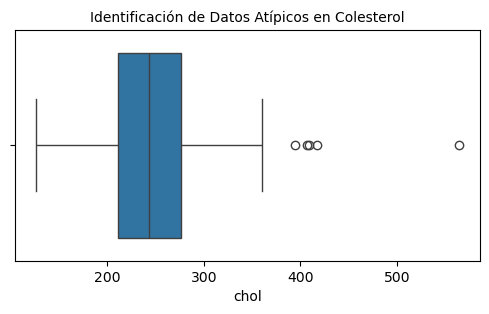

In [261]:
# 2. Colesterol (chol)

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Atípicos en Colesterol', fontsize=10)

In [263]:
# 2. Colesterol (chol)

nivel_min_chol = 100
nivel_max_chol = 500
Total_Atipicos_chol = ((Datos['chol'] < nivel_min_chol) | (Datos['chol'] > nivel_max_chol)).sum()
print("El total de datos atípicos en Colesterol es {}".format(Total_Atipicos_chol))

El total de datos atípicos en Colesterol es 1


In [265]:
# Filtrar Datos Atípicos

Datos = Datos[(Datos['chol'] >= nivel_min_chol) & (Datos['chol'] <= nivel_max_chol)]

In [267]:
# Validar si se removieron los datos atípicos

Total_Atipicos_chol = ((Datos['chol'] < nivel_min_chol) | (Datos['chol'] > nivel_max_chol)).sum()
print("El total de datos atípicos en Colesterol es {}".format(Total_Atipicos_chol))

El total de datos atípicos en Colesterol es 0


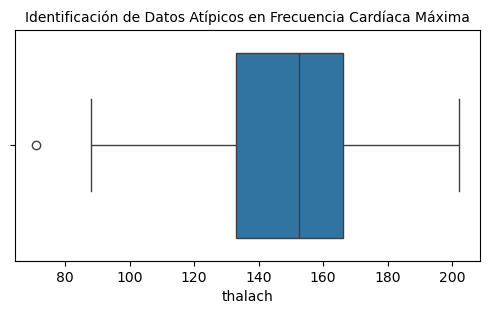

In [269]:
# 3. Frecuencia Cardíaca Máxima (thalach)

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Atípicos en Frecuencia Cardíaca Máxima', fontsize=10)
plt.show()

In [271]:
# 3. Frecuencia Cardíaca Máxima (thalach)

nivel_min_thalach = 70
nivel_max_thalach = 220
Total_Atipicos_thalach = ((Datos['thalach'] < nivel_min_thalach) | (Datos['thalach'] > nivel_max_thalach)).sum()
print("El total de datos atípicos en Frecuencia Cardíaca Máxima es {}".format(Total_Atipicos_thalach))

El total de datos atípicos en Frecuencia Cardíaca Máxima es 0


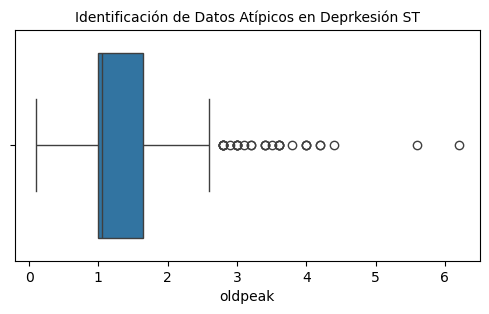

In [273]:
# 4. Depresión ST (oldpeak)

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Atípicos en Deprkesión ST', fontsize=10)
plt.show()

In [275]:
# 4. Depresión ST (oldpeak)

nivel_min_oldpeak = 0
nivel_max_oldpeak = 6
Total_Atipicos_oldpeak = ((Datos['oldpeak'] < nivel_min_oldpeak) | (Datos['oldpeak'] > nivel_max_oldpeak)).sum()
print("El total de datos atípicos en Depresión ST es {}".format(Total_Atipicos_oldpeak))

El total de datos atípicos en Depresión ST es 1


In [277]:
# Filtrar Datos Atípicos

Datos = Datos[(Datos['oldpeak'] >= nivel_min_oldpeak) & (Datos['oldpeak'] <= nivel_max_oldpeak)]

In [279]:
# Validar si se removieron los datos atípicos

Total_Atipicos_oldpeak = ((Datos['oldpeak'] < nivel_min_oldpeak) | (Datos['oldpeak'] > nivel_max_oldpeak)).sum()
print("El total de datos atípicos en Depresión ST es {}".format(Total_Atipicos_oldpeak))

El total de datos atípicos en Depresión ST es 0


In [281]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        295 non-null    int64  
 1   sex        295 non-null    int64  
 2   cp         295 non-null    int64  
 3   trestbps   295 non-null    int64  
 4   chol       295 non-null    int64  
 5   fbs        295 non-null    float64
 6   restecg    295 non-null    int64  
 7   thalach    295 non-null    int64  
 8   exang      295 non-null    int64  
 9   oldpeak    295 non-null    float64
 10  slope      295 non-null    float64
 11  ca         295 non-null    float64
 12  thal       295 non-null    float64
 13  condition  295 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 34.6 KB


3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [284]:
# Conteo total de personas con y sin enfermedad cardíaca

print("Total de personas con enfermedad cardíaca:")
print(Datos['condition'].value_counts())

Total de personas con enfermedad cardíaca:
condition
0    159
1    136
Name: count, dtype: int64


In [286]:
# Muestra los primeros 40 registros de la columna 'condition'
Datos[['condition']].head(20)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [289]:
from sklearn.model_selection import train_test_split

# Variables X e Y para entrenamiento

X = Datos.drop('condition', axis=1)  # Datos sin la columna objetivo 'condition'
Y = Datos['condition']  # Columna objetivo

# División en train y test (75% para entrenamiento, 25% para prueba)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [291]:
print (X_train)

     age  sex  cp  trestbps  chol       fbs  restecg  thalach  exang  \
232   57    0   3       128   303  0.144781        2      159      0   
53    48    1   1       130   245  0.144781        2      180      0   
102   58    1   2       140   211  1.000000        2      165      0   
189   62    0   3       138   294  1.000000        0      106      0   
169   66    1   3       160   228  0.144781        2      138      0   
..   ...  ...  ..       ...   ...       ...      ...      ...    ...   
73    71    0   2       110   265  1.000000        2      130      0   
167   66    0   3       178   228  1.000000        0      165      1   
154   37    0   2       120   215  0.144781        0      170      0   
153   37    1   2       130   250  0.144781        0      187      0   
260   51    1   3       140   298  0.144781        0      122      1   

      oldpeak     slope        ca      thal  
232  1.055556  0.602694  1.000000  0.835017  
53   0.200000  1.000000  0.676768  0.835017

In [293]:
print (Y_train)

232    0
53     0
102    0
189    1
169    0
      ..
73     0
167    1
154    0
153    0
260    1
Name: condition, Length: 221, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros

In [296]:
from sklearn.linear_model import LogisticRegression

# Construir el modelo de regresión logística
modelo_regresion = LogisticRegression(solver="liblinear")  # Configuración del solver
modelo_regresion.fit(X_train, Y_train)  # Entrenar el modelo

# Realizar predicciones en el conjunto de prueba
Prediccion = modelo_regresion.predict(X_test)  # Predicciones con los datos de validación

In [298]:
print (Y_test)

112    0
252    1
241    1
163    1
285    0
      ..
172    0
136    1
138    0
221    1
33     1
Name: condition, Length: 74, dtype: int64


In [300]:
print("\nPredicciones del modelo:")
print(Prediccion)  # Muestra los valores predichos por el modelo


Predicciones del modelo:
[0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0]


In [302]:
# Mostrar los resultados
print("Valores reales (Y_test):")
print(Y_test.values)  # Muestra los valores reales


Valores reales (Y_test):
[0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [305]:
from sklearn.metrics import classification_report

# Evaluación del desempeño del modelo de regresión
print("Desempeño del modelo de regresión logística:")
print(classification_report(Y_test, Prediccion))

Desempeño del modelo de regresión logística:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.85      0.87        34

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74



7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

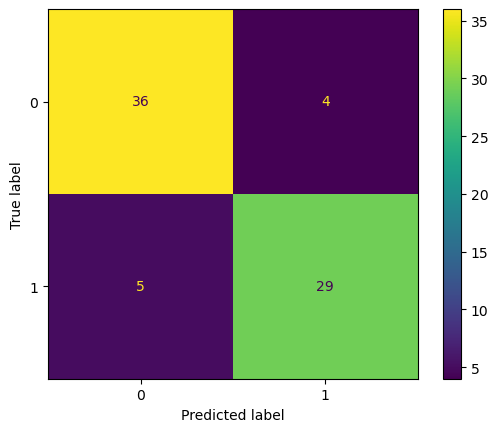

In [308]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generación de la matriz de confusión
cm = confusion_matrix(Y_test, Prediccion)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

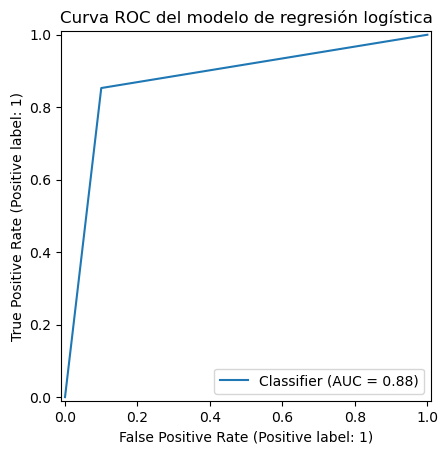

In [310]:
from sklearn.metrics import RocCurveDisplay

# Generación de la curva ROC para evaluar el rendimiento del modelo
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.title("Curva ROC del modelo de regresión logística")
plt.show()

8. Interpretar, analizar y documentar los resultados obtenidos

Interpretación de la Matriz de Confusión
La matriz de confusión muestra el desempeño del modelo al clasificar los datos de prueba:

Verdaderos Negativos (36): Son las observaciones que el modelo clasificó correctamente como negativas.
Verdaderos Positivos (29): Son las observaciones que el modelo clasificó correctamente como positivas.
Falsos Positivos (4): Son las observaciones que el modelo clasificó incorrectamente como positivas.
Falsos Negativos (5): Son las observaciones que el modelo clasificó incorrectamente como negativas.
De esta matriz, podemos ver que el modelo tiene un buen desempeño en ambas clases, con una baja cantidad de falsos positivos y falsos negativos. Esto sugiere que el modelo es capaz de identificar correctamente tanto los casos positivos como negativos en la mayoría de las ocasiones.

Interpretación de la Curva ROC y AUC
La curva ROC y el AUC (Área Bajo la Curva) proporcionan una medida de la capacidad del modelo para distinguir entre clases positivas y negativas. En este caso:

AUC = 0.88: Esto indica que el modelo tiene un buen desempeño general, ya que el AUC se encuentra cerca de 1. Un AUC de 0.88 significa que el modelo tiene una alta capacidad para clasificar correctamente los casos positivos y negativos en una variedad de umbrales de clasificación.

Desempeño General del Modelo:
El desempeño del modelo es prometedor, con una buena precisión y sensibilidad en ambas clases. Esto indica que el modelo es robusto y confiable para la predicción en este conjunto de datos, logrando un buen balance entre precisión y recall.